
## Zip 介紹


當你想將多個列表（list）的相對應元素配對起來時，Python 的內建函式 zip() 就像拉鍊一樣，能夠把它們緊密結合。<br>
這個功能不僅直觀，而且極其實用。接下來，我將通過三個實戰案例，來展示 zip() 函式的強大用途。

- 矩陣轉置：用 Python 解 LeetCode 演算法題目常用技巧
- dict 反轉：NLP 資料分析建立詞庫
- 同時迭代多個長短不一的 list：zip() 的進階用法

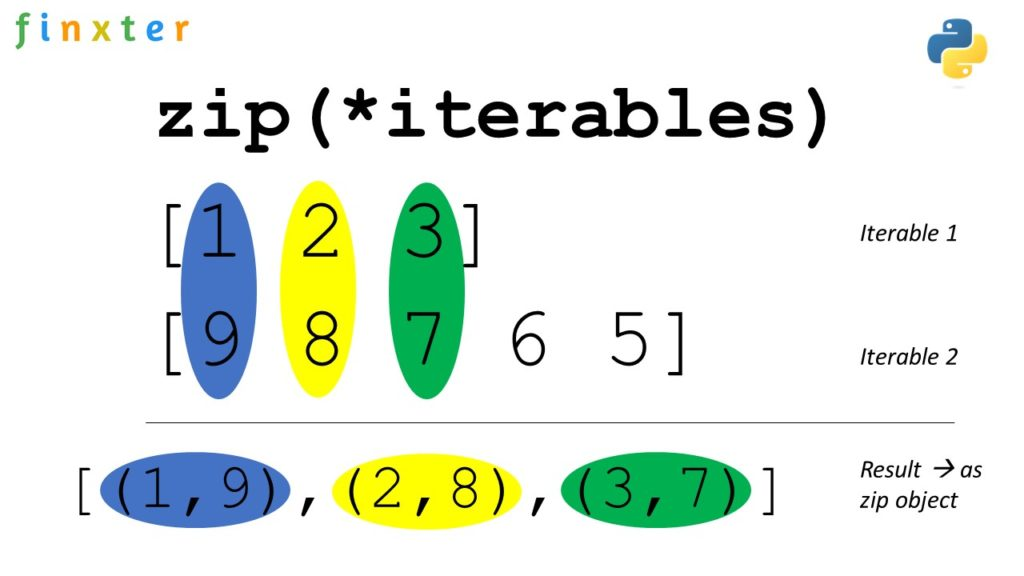

## 1. 基礎用法
zip() 函式可以接受任意多個可迭代對象作為引數，比如列表（list）、集合（set）、字典（dict）或字符串（str），並將它們對應的元素打包成一個個的元組（tuple），最後返回一個包含這些元組的迭代器。

In [1]:
# 定義三個可迭代對象
x = ['a', 'b', 'c']
y = [1, 2, 3]

# 使用 zip() 函式將 x 和 y 對應打包，並遍歷輸出
for pair in zip(x, y):
    print(pair)


('a', 1)
('b', 2)
('c', 3)


### 轉換 zip 物件
雖然 zip() 返回的是一個迭代器，你可以很容易地將它轉換成列表（list）、集合（set）或其他類型的數據結構。

In [3]:
# 轉換成列表
list(zip(x, y))
# 轉換成集合
set(zip(x, y))


{('a', 1), ('b', 2), ('c', 3)}

### 多個迭代對象
zip() 函式不僅限於兩個，它可以處理任意多個迭代對象，將它們的對應元素打包在一起。

In [8]:
# 定義一個字符串和一個集合
x = "abc"
y = {2021, 1, 29}

# 字典，我們將只使用它的鍵（key）
z = {'first': 0.5, 'second': 0.6, 'third': 0.7}

print("===========")
# 使用 zip() 對這三個對象進行迭代
for i in zip(x, y, z):
    print(i)

'''
注意事項
集合（set）是無序的，所以當你使用 zip() 與集合一起時，元素的順序可能會有所不同。
直接對字典（dict）使用 zip() 時，只會迭代它的鍵（key）。如果你想迭代值（value），可以使用 .values() 方法。
'''

print("===========")
# 使用字典的值
for i in zip(x, y, z.values()):
    print(i)


('a', 1, 'first')
('b', 29, 'second')
('c', 2021, 'third')
('a', 1, 0.5)
('b', 29, 0.6)
('c', 2021, 0.7)


## 2. 矩陣轉置

矩陣轉置是一個常見的操作，在許多場合下都非常有用，特別是在數據處理和數學計算中。在 Python 中，利用 zip() 函式結合星號操作符（*），我們可以非常簡單地實現矩陣轉置。星號操作符用於解包可迭代對象，使其成為獨立的參數。

要轉置這個矩陣，我們可以使用 zip(*matrix)。這裡，*matrix 將原矩陣解包成三個獨立的列表，作為 zip() 的參數，這樣每次 zip() 將從這三個列表中各取出一個元素，組成一個新的元組，從而達到轉置的效果。


In [17]:
matrix = [
  [1, 2],
  [3, 4],
  [5, 6]
]

# 使用 zip() 進行矩陣轉置
transposed_matrix = list(zip(*matrix))

# 打印轉置後的矩陣

for row in transposed_matrix:
    print(row)

print("===========")

# 將轉置後的結果轉換為 list of lists
transposed_matrix_as_lists = [list(row) for row in zip(*matrix)]
# 打印轉換後的結果
for row in transposed_matrix_as_lists:
    print(row)



(1, 3, 5)
(2, 4, 6)
[1, 3, 5]
[2, 4, 6]


## 3. dict 反轉
在處理字典數據時，有時我們需要將字典的鍵（keys）和值（values）進行互換，即進行字典反轉。這在某些情境下特別有用，例如，當我們需要根據值來查找鍵時。在 Python 中，可以利用字典推導式（dictionary comprehension）或 zip() 函式來實現這一操作。



### 使用 dictionary comprehension 進行反轉
是一種簡潔的方法來構建字典。它允許通過遍歷一個可迭代對象來動態地構建字典。利用字典的 .items() 方法，我們可以獲得一個包含所有鍵值對的可迭代對象，然後通過字典推導式將鍵值互換。

In [18]:
# 定義一個字典
my_dict = {'a': 1, 'b': 2, 'c': 3}

# 使用字典推導式進行反轉
inverted_dict = {value: key for key, value in my_dict.items()}
print(inverted_dict)


{1: 'a', 2: 'b', 3: 'c'}


### 使用 zip() 進行反轉
zip() 函式可以將多個可迭代對象中的相對應元素打包成一個個元組，這一特性允許我們將字典的鍵和值作為兩個獨立的列表進行“拉鍊”，進而實現反轉。

In [19]:
# 使用 zip() 進行反轉
inverted_dict_by_zip = dict(zip(my_dict.values(), my_dict.keys()))
print(inverted_dict_by_zip)


{1: 'a', 2: 'b', 3: 'c'}


## dict 反轉 - NLP 建立詞庫

在自然語言處理（NLP）中，建立詞庫（word index mapping）是一項基礎且關鍵的任務。這涉及到將文本數據中的每個獨立詞彙映射到一個唯一的數字索引上，同時還需要能夠將這些數字索引映射回對應的詞彙。這使得文本數據能夠以數字形式被機器學習模型處理，並在需要時轉換回可讀的文本形式。

1. 預處理文本數據：首先需要對文本數據進行預處理，包括轉換為小寫、去除標點符號等，以確保詞彙的一致性。
2. 建立 文字 -> index 的詞庫：對處理後的文本中的獨立詞彙進行編號，創建一個從詞彙到索引編號的映射字典。
3. 建立 index -> 文字 的映射關係：利用字典反轉技巧，創建一個從索引編號映射回詞彙的字典。

In [20]:
# 示例句子
sentence = "My name is sunny. I'm cool."

# 預處理文本數據：轉小寫並去除標點
sentence_list = [w.lower().strip('.') for w in sentence.split()]

# 使用 set 去除重複詞彙
unique_words = set(sentence_list)

# 建立 `文字 -> index` 的詞庫
word2index = {word: index for index, word in enumerate(unique_words)}

# 使用 zip() 反轉字典，建立 `index -> 文字` 的詞庫
index2word = dict(zip(word2index.values(), word2index.keys()))

# 展示建立的詞庫
print("Word to Index Mapping:", word2index)
print("Index to Word Mapping:", index2word)

# 將句子轉換為索引列表
sentence_index_list = [word2index[word] for word in sentence_list]

# 將索引列表轉換回文本
reconstructed_sentence = ' '.join(index2word[index] for index in sentence_index_list)

print("Original Sentence:", sentence)
print("Sentence as Indexes:", sentence_index_list)
print("Reconstructed Sentence:", reconstructed_sentence)


Word to Index Mapping: {"i'm": 0, 'my': 1, 'is': 2, 'name': 3, 'sunny': 4, 'cool': 5}
Index to Word Mapping: {0: "i'm", 1: 'my', 2: 'is', 3: 'name', 4: 'sunny', 5: 'cool'}
Original Sentence: My name is sunny. I'm cool.
Sentence as Indexes: [1, 3, 2, 4, 0, 5]
Reconstructed Sentence: my name is sunny i'm cool


## 4. 同時迭代多個長短不一的 list

In [30]:
# 範例：多個 list 長短不一，又想用 zip() 同時走訪
list_a = [1,   2]
list_b = ['a', 'b', 'c', 'd', 'e']
list_c = [0.5, 0.7, 0.9]
for i in zip(list_a, list_b, list_c):
    print(i)


print("===========")
## 明明最長的 list 有 5 個元素
## 使用 zip() 之後只剩下走訪 2 個元素！
## 如果 zip() 引數之中混入一個長度為 0 的 list
## 就不會走訪任何內容囉
## 而且不會出現 error
for i in zip([], list_a, list_b, list_c):
    print(i)

len(list(zip([], list_a, list_b, list_c)))



(1, 'a', 0.5)
(2, 'b', 0.7)


0

### zip_longest()
當需要根據最長的列表進行迭代時，zip_longest() 並且可以通過設置 fillvalue 參數來指定填充值。

In [26]:
from itertools import zip_longest

list_a = [1, 2]
list_b = ['a', 'b', 'c', 'd', 'e']
list_c = [0.5, 0.7, 0.9]

# 使用 zip_longest 進行迭代，並設定 fillvalue
for item in zip_longest(list_a, list_b, list_c, fillvalue="NO_VALUE"):
    print(item)


(1, 'a', 0.5)
(2, 'b', 0.7)
('NO_VALUE', 'c', 0.9)
('NO_VALUE', 'd', 'NO_VALUE')
('NO_VALUE', 'e', 'NO_VALUE')


### cycle() 和 repeat()
cycle() 和 repeat() 是 itertools 模塊提供的另外兩個有用的工具，可以用於處理迭代中的特殊需求。

- cycle() 會不斷地循環給定的列表，直到最長的列表被遍歷完畢。
- repeat() 會重複生成指定的值，可以用來在迭代中加入固定的元素。

In [28]:
from itertools import cycle, repeat

# 使用 cycle 和 repeat
for item in zip(cycle(list_a), list_b, cycle(list_c), repeat("ʕ •ᴥ•ʔ")):
    print(item)


(1, 'a', 0.5, 'ʕ •ᴥ•ʔ')
(2, 'b', 0.7, 'ʕ •ᴥ•ʔ')
(1, 'c', 0.9, 'ʕ •ᴥ•ʔ')
(2, 'd', 0.5, 'ʕ •ᴥ•ʔ')
(1, 'e', 0.7, 'ʕ •ᴥ•ʔ')
